In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import random


In [2]:
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])
titanic_df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 11 columns):
pclass       1043 non-null int64
survived     1043 non-null int64
name         1043 non-null object
sex          1043 non-null object
age          1043 non-null float64
sibsp        1043 non-null int64
parch        1043 non-null int64
ticket       1043 non-null object
fare         1043 non-null float64
embarked     1043 non-null object
home.dest    1043 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 97.8+ KB


In [4]:
titanic_df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

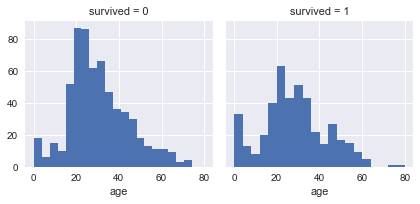

In [28]:
import seaborn as sns

g = sns.FacetGrid(titanic_df, col='survived')
g.map(plt.hist, 'age', bins=20)

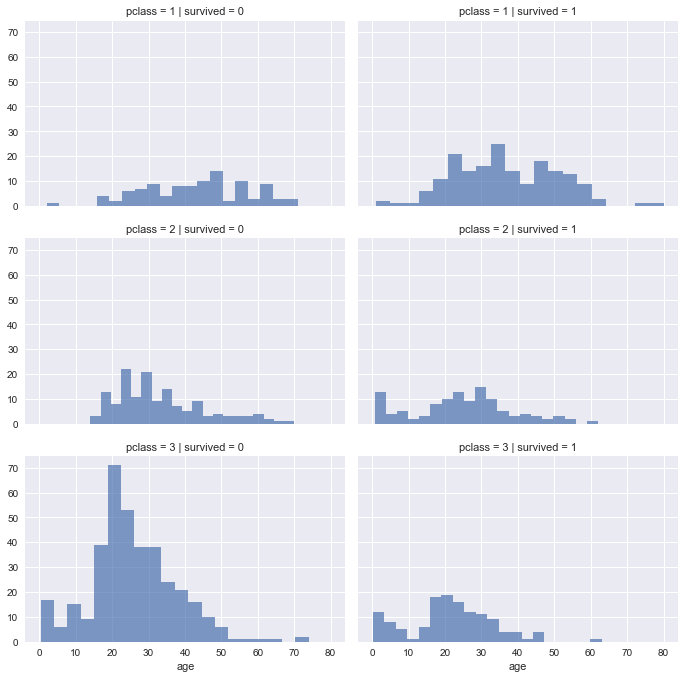

In [36]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(titanic_df, col='survived', row='pclass', size=3.2, aspect=1.5)
grid.map(plt.hist, 'age', alpha=.7, bins=20)
grid.add_legend()

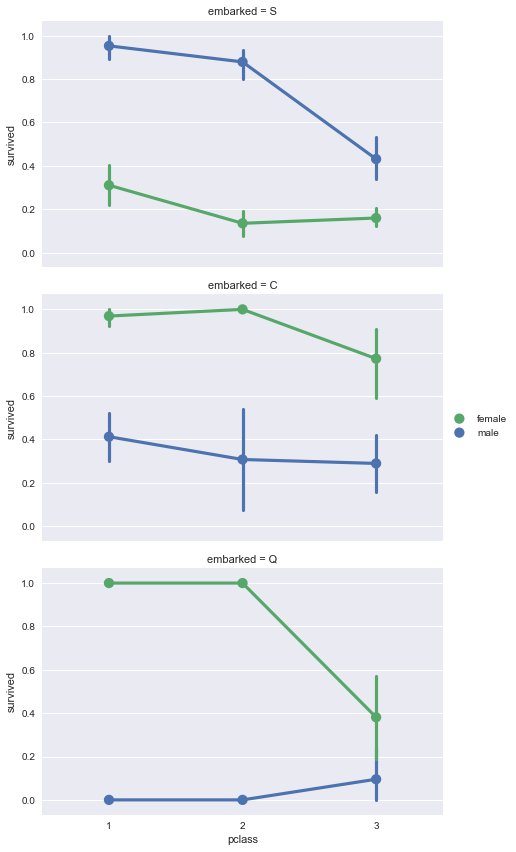

In [39]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(titanic_df, row='embarked', size=4.0, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

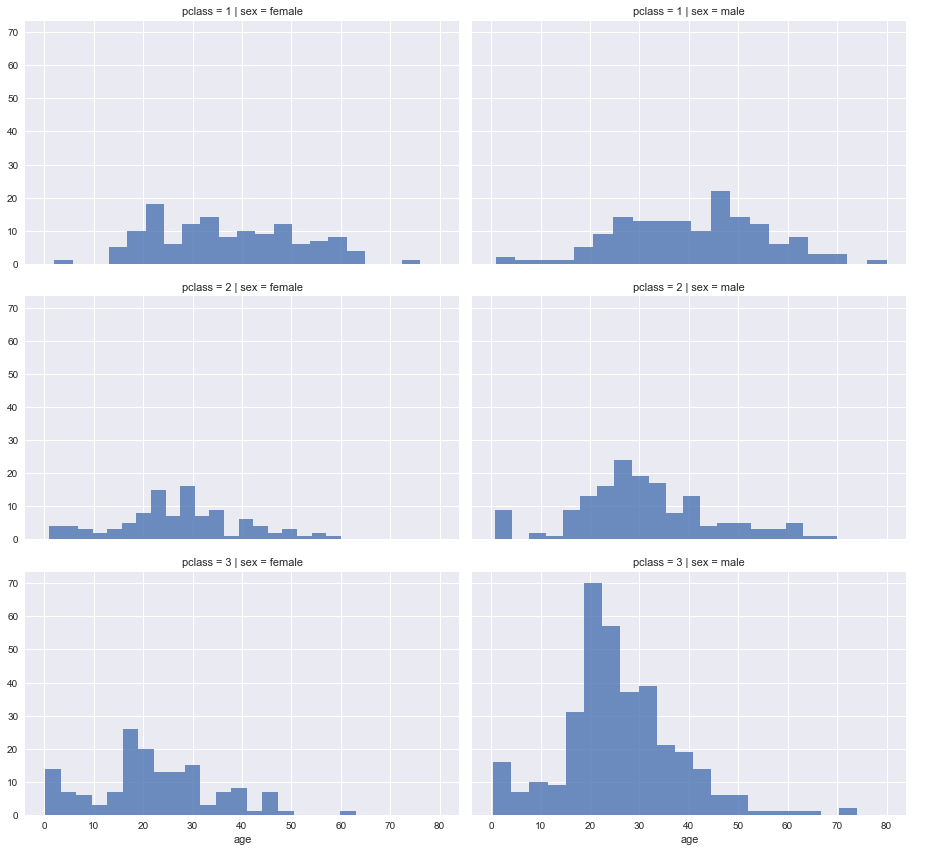

In [42]:
grid = sns.FacetGrid(titanic_df, row='pclass', col='sex', size=4.0, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.8, bins=20)
grid.add_legend()

In [44]:
test_df    = titanic_df.drop(['name','ticket'], axis=1)

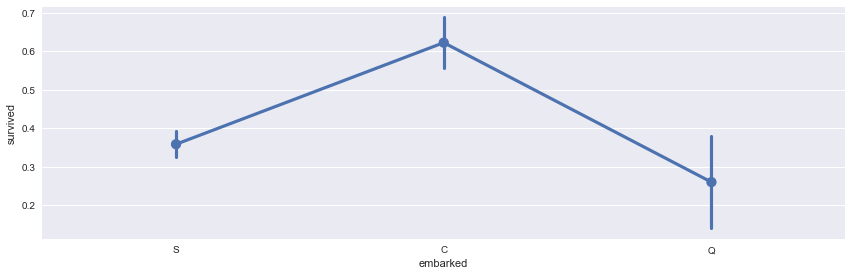

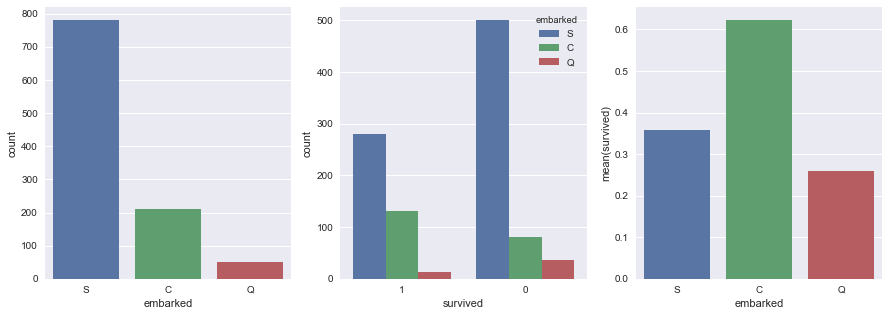

In [45]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["embarked"] = titanic_df["embarked"].fillna("S")

# plot
sns.factorplot('embarked','survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='embarked', data=titanic_df, ax=axis1)
sns.countplot(x='survived', hue="embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["embarked", "survived"]].groupby(['embarked'],as_index=False).mean()
sns.barplot(x='embarked', y='survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_df['embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['embarked'], axis=1,inplace=True)
test_df.drop(['embarked'], axis=1,inplace=True)

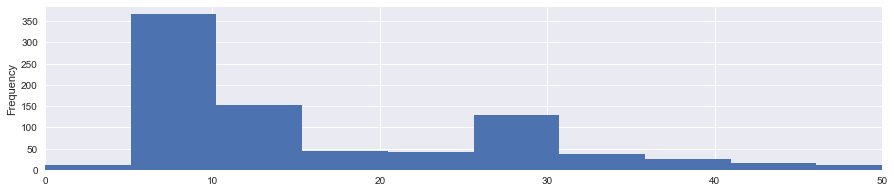

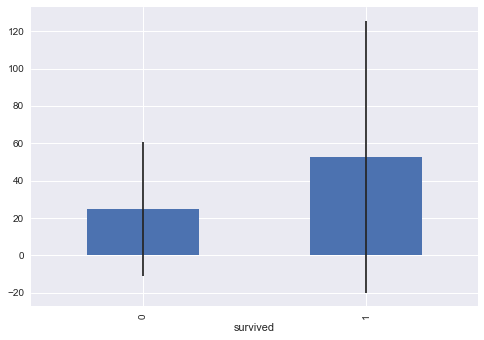

In [48]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["fare"].fillna(test_df["fare"].median(), inplace=True)

# convert from float to int
titanic_df['fare'] = titanic_df['fare'].astype(int)
test_df['fare']    = test_df['fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_df["fare"][titanic_df["survived"] == 0]
fare_survived     = titanic_df["fare"][titanic_df["survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


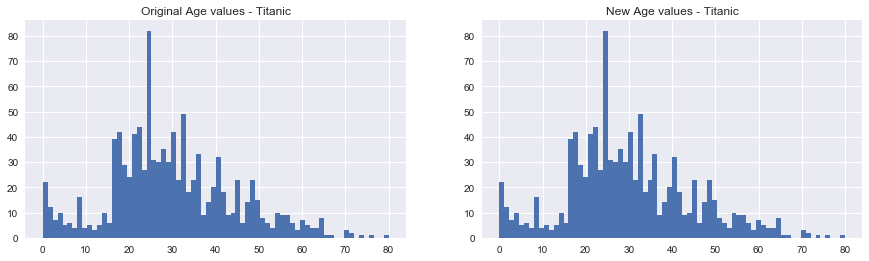

In [51]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["age"].mean()
std_age_titanic       = titanic_df["age"].std()
count_nan_age_titanic = titanic_df["age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)


# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["age"][np.isnan(titanic_df["age"])] = rand_1

# convert from float to int
titanic_df['age'] = titanic_df['age'].astype(int)
        
# plot new Age Values
titanic_df['age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

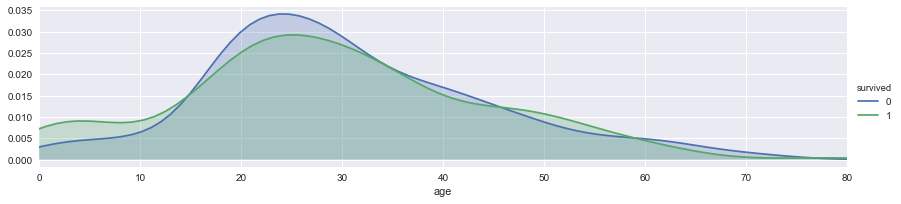

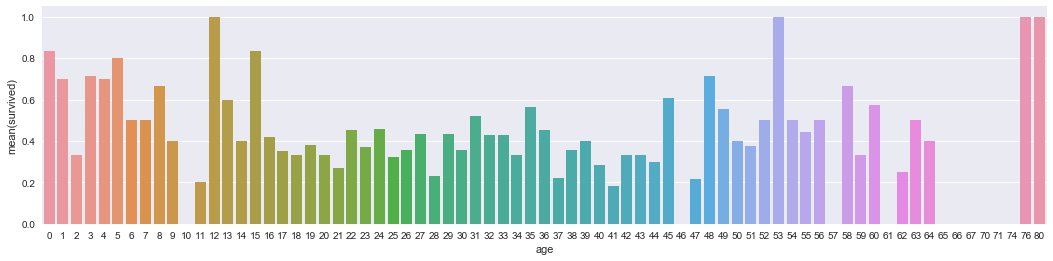

In [52]:
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="survived",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, titanic_df['age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["age", "survived"]].groupby(['age'],as_index=False).mean()
sns.barplot(x='age', y='survived', data=average_age)

C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[<matplotlib.text.Text at 0x2113e5c0>, <matplotlib.text.Text at 0x20d11c88>]

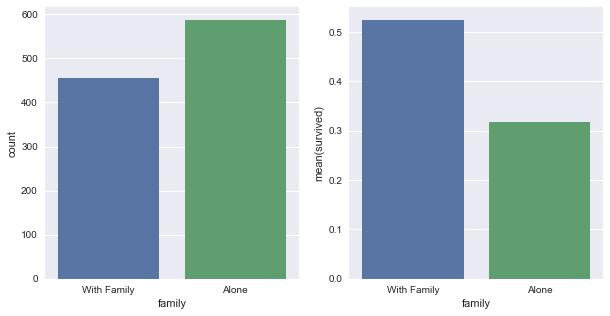

In [54]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_df['family'] =  titanic_df["parch"] + titanic_df["sibsp"]
titanic_df['family'].loc[titanic_df['family'] > 0] = 1
titanic_df['family'].loc[titanic_df['family'] == 0] = 0

# drop Parch & SibSp
titanic_df = titanic_df.drop(['sibsp','parch'], axis=1)
# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["family", "survived"]].groupby(['family'],as_index=False).mean()
sns.barplot(x='family', y='survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

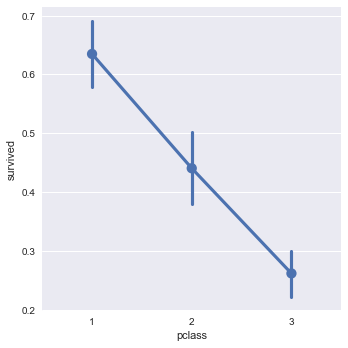

In [59]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('pclass','survived',order=[1,2,3], data=titanic_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)

In [5]:
titanic_df= titanic_df.drop(['body','cabin','boat'], axis=1)
titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")
titanic_df = titanic_df.dropna()
titanic_df.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [6]:
from sklearn import preprocessing

def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
#    processed_df = processed_df.drop(['name'],axis=1)
    return processed_df

pro_df = preprocess_titanic_df(titanic_df)

pro_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


In [7]:
X = pro_df.drop(['survived'], axis=1).values
y = pro_df['survived'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Computational Brains — An Introduction to Deep Neural Networks
## 작은 글씨

In [9]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=7)]

In [10]:
tf_clf_dnn = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[20, 40, 20], n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': None, '_environment': 'local', '_save_summary_steps': 100, '_master': '', '_save_checkpoints_secs': 600, '_task_type': None, '_evaluation_master': '', '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000000CAB5EB8>, '_task_id': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_keep_checkpoint_max': 5, '_num_ps_replicas': 0, '_save_checkpoints_steps': None}


In [11]:
tf_clf_dnn.fit(x=X_train, y=y_train, steps=1000)
#tf_clf_dnn.fit()

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpct04kp6j\model.ckpt.
INFO:tensorflow:loss = 1.84105, step = 1
INFO:tensorflow:global_step/sec: 216.438
INFO:tensorflow:loss = 0.604195, step = 101
INFO:tensorflow:global_step/sec: 211.852
INFO:tensorflow:loss = 0.59076, step = 201
INFO:tensorflow:global_step/sec: 204.906
INFO:tensorflow:loss = 0.573427, step = 301
INFO:tensorflow:global_step/sec: 200.792
INFO:tensorflow:loss = 0.55753, step = 401
INFO:tensorflow:global_step/sec: 203.24
INFO:tensorflow:loss = 0.50949, step = 501
INFO:tensorflow:global_step/sec: 204.487
INFO:tensorflow:loss = 0.493265, step = 601
INFO:tensorflow:global_step/sec: 204.906
INFO:tensorflow:loss = 0.476719, step = 701
INFO:tensorflow:global_step/sec: 205.327
INFO:tensorflow:loss = 0.463093, step = 801
INFO:tensorflow:global_step/sec: 212.754
INFO:tensorflow:loss = 0.454908, step = 901
INFO:tensorflow:Saving checkpoints for

DNNClassifier(params={'dropout': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=7, default_value=None, dtype=tf.float32, normalizer=None),), 'hidden_units': [20, 40, 20], 'embedding_lr_multipliers': None, 'gradient_clip_norm': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x000000000C9B8D30>, 'optimizer': None, 'input_layer_min_slice_size': None, 'activation_fn': <function relu at 0x00000000079C5378>})

In [12]:
#tf_clf_dnn.score(X_test, y_test)
y_pred = tf_clf_dnn.predict(X_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


In [13]:
accuracy_score = tf_clf_dnn.evaluate(x=X_test,y=y_test)["accuracy"]

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Starting evaluation at 2017-06-25-02:09:49
INFO:tensorflow:Finished evaluation at 2017-06-25-02:09:50
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.817891, accuracy/baseline_label_mean = 0.402556, accuracy/threshold_0.500000_mean = 0.817891, auc = 0.841652, global_step = 1000, labels/actual_label_mean = 0.402556, labels/prediction_mean = 0.346827, loss = 0.477802, precision/positive_threshold_0.500000_mean = 0.848485, recall/positive_threshold_0.500000_mean = 0.666667


In [14]:
print ('score : %8.4f' % accuracy_score)

score :   0.8179


1등석에서 10명 2등석에서 10명 3등석에서 10명으로 테스트해보자

In [15]:
passengers_set_1 = titanic_df[titanic_df.pclass == 1].iloc[:10,:].copy()
passengers_set_2 = titanic_df[titanic_df.pclass == 2].iloc[:10,:].copy()
passengers_set_3 = titanic_df[titanic_df.pclass == 3].iloc[:10,:].copy()
passenger_set = pd.concat([passengers_set_1,passengers_set_2,passengers_set_3])

In [16]:
testing_set = preprocess_titanic_df(passenger_set)

In [17]:
training_set = pd.concat([titanic_df, passenger_set]).drop_duplicates(keep=False)
training_set = preprocess_titanic_df(training_set)

In [18]:
testing_set.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,1
1,1,1,1,0.9167,1,2,151.5500,1
2,1,0,0,2.0000,1,2,151.5500,1
3,1,0,1,30.0000,1,2,151.5500,1
4,1,0,0,25.0000,1,2,151.5500,1
5,1,1,1,48.0000,0,0,26.5500,1
6,1,1,0,63.0000,1,0,77.9583,1
7,1,0,1,39.0000,0,0,0.0000,1
8,1,1,0,53.0000,2,0,51.4792,1
9,1,0,1,71.0000,0,0,49.5042,0


In [19]:
X_train = training_set.drop(['survived'], axis=1).values
y_train = training_set['survived'].values

X_test = testing_set.drop(['survived'], axis=1).values
y_test = testing_set['survived'].values

(연습, batch_size와 steps를 조절)

In [20]:
tf_clf_dnn.fit(X_test, y_test, batch_size=20, steps=1000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scal

C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1001 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpct04kp6j\model.ckpt.
INFO:tensorflow:loss = 0.509582, step = 1001
INFO:tensorflow:global_step/sec: 812.963
INFO:tensorflow:loss = 0.333579, step = 1101
INFO:tensorflow:global_step/sec: 980.335
INFO:tensorflow:loss = 0.348776, step = 1201
INFO:tensorflow:global_step/sec: 934.526
INFO:tensorflow:loss = 0.263314, step = 1301
INFO:tensorflow:global_step/sec: 961.483
INFO:tensorflow:loss = 0.327049, step = 1401
INFO:tensorflow:global_step/sec: 869.516
INFO:tensorflow:loss = 0.209141, step = 1501
INFO:tensorflow:global_step/sec: 970.818
INFO:tensorflow:loss = 0.208529, step = 1601
INFO:tensorflow:global_step/sec: 990.042
INFO:tensorflow:loss = 0.391002, step = 1701
INFO:tensorflow:global_step/sec: 980.335
INFO:tensorflow:loss = 0.298457, step = 1801
INFO:tensorflow:global_step/sec: 980.337
INFO:tensorflow:loss = 0.0983316, step = 1901
INFO:tensorflow:S

DNNClassifier(params={'dropout': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=7, default_value=None, dtype=tf.float32, normalizer=None),), 'hidden_units': [20, 40, 20], 'embedding_lr_multipliers': None, 'gradient_clip_norm': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x000000000C9B8D30>, 'optimizer': None, 'input_layer_min_slice_size': None, 'activation_fn': <function relu at 0x00000000079C5378>})

In [21]:
score = tf_clf_dnn.evaluate(x=X_test,y=y_test)["accuracy"]

prediction = list(tf_clf_dnn.predict(X_test))
#print('Accuracy: {0:f}'.format(score))
print('Accuracy : %8.4f' % score)
print(y_test)
print(prediction)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Starting evaluation at 2017-06-25-02:09:57
INFO:tensorflow:Finished evaluation at 2017-06-25-02:09:58
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.933333, accuracy/baseline_label_mean = 0.4, accuracy/threshold_0.500000_mean = 0.933333, auc = 0.993055, global_step = 2000, labels/actual_label_mean = 0.4, labels/prediction_mean = 0.378665, loss = 0.112034, precision/positive_threshold_0.500000_mean = 0.916667, recall/positive_threshold_0.500000_mean = 0.916667
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Accuracy :   0.9333
[1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0]
[1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0]


In [22]:
passenger_set[passenger_set.survived != prediction]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,S,"Montreal, PQ / Chesterville, ON"
605,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.65,S,"Perkins County, SD"
